In [26]:
%matplotlib inline 

import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt

In [35]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
matplotlib.style.use('ggplot')

In [30]:
df = quandl.get('WIKI/GOOGL')

In [31]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_percent'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100
df['day_percent'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100
df = df[['Adj. Close', 'HL_percent', 'day_percent']]

In [32]:
print df.head()

            Adj. Close  HL_percent  day_percent
Date                                           
2004-08-19   50.322842    8.441017     0.324968
2004-08-20   54.322689    8.537313     7.227007
2004-08-23   54.869377    4.062357    -1.227880
2004-08-24   52.597363    7.753210    -5.726357
2004-08-25   53.164113    3.966115     1.183658


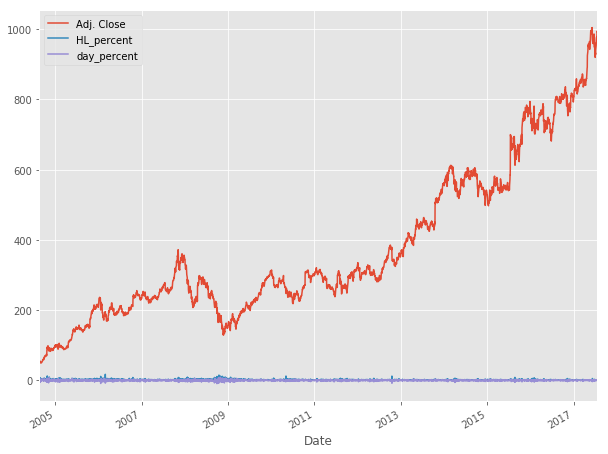

In [34]:
plt.figure(); df.plot();

In [51]:
forecast_col = 'Adj. Close'
df.fillna(-9999999, inplace=True)
forecast_days = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_days)
df.dropna(inplace=True)
print "Getting predictions for %d days in advance\n"%forecast_days
print df.head()

Getting predictions for 32 days in advance

            Adj. Close  HL_percent  day_percent      label
Date                                                      
2004-08-19   50.322842    8.441017     0.324968  69.399229
2004-08-20   54.322689    8.537313     7.227007  68.752232
2004-08-23   54.869377    4.062357    -1.227880  69.639972
2004-08-24   52.597363    7.753210    -5.726357  69.078238
2004-08-25   53.164113    3.966115     1.183658  67.839414


In [39]:
x = np.array(df.drop(['label'], 1))
y = np.array(df['label'])
x = preprocessing.scale(x)

#Make sure that the length of x and y are equal
print len(x), len(y)

3221 3221


In [41]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2)

In [47]:
clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print "LinearRegression Accuracy is : %.2f%%"%(accuracy*100)

Accuracy is : 97.65%


In [52]:
clf = svm.SVR()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print "SVM Regression Accuracy is : %.2f%%"%(accuracy*100)

SVM Regression Accuracy is : 79.94%
